# Dataset 1: Census Income Analysis
This data collection was extracted from the census bureau database. There are 48842 instances of data set, mix of continuous and discrete.
The data set has 15 attribute which include age, sex, education level and other relevant details of a person.

[Source](https://code.datasciencedojo.com/datasciencedojo/datasets/blob/master/Census%20Income/README.md)

## Reasoning
This dataset relates both demographic and specific information of individuals, matching them with 2 possible income groups (<=50k and >50k). I hope to get meaningful insights that answer potential questions about economical success given a person's information. 

## 1. Initial Exploration of the Titanic Dataset

### 1.1 Loading the dataset

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('datasets/census_income.csv')
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


#### 1.1.1 What I notice
- This dataset doesn't have associated headers by default. 

These should be manually added, taking into account the source website information:

| Column Position | Attribute Name | Definition                                                                                                                      | Data Type    | Example                                 | % Null Ratios |
| --------------- | -------------- | ------------------------------------------------------------------------------------------------------------------------------- | ------------ | --------------------------------------- | ------------- |
| 1               | age            | Age (years)                                                                                                                     | Quantitative | 38, 42, 71                              | 0             |
| 2               | workclass      | Workclass: 8 categories (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked) | Qualitative  | "Private", "Local-gov", "Never-worked"  | 6             |
| 3               | fnlwgt         | Final Weight*                                                                                                                   | Quantitative | 83311, 338409                           | 0             |
| 4               | education      | Education levels (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, etc.)                             | Qualitative  | "Bachelors", "9th", "Preschool"         | 0             |
| 5               | education-num  | Years of education                                                                                                              | Quantitative | 13, 9, 7                                | 0             |
| 6               | marital-status | Marital Status: (Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse)     | Qualitative  | "Divorced", "Separated", "Widowed"      | 0             |
| 7               | occupation     | Occupation: (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, ... Armed-Forces)               | Qualitative  | "Tech-support", "Armed-Forces", "Sales" | 6             |
| 8               | relationship   | Relationship: (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried)                                              | Qualitative  | "Wife", "Unmarried", "Own-child"        | 0             |
| 9               | race           | Race: (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)                                                             | Qualitative  | "White", "Asian-Pac-Islander", "Other"  | 0             |
| 10              | sex            | Sex: (Male, Female)                                                                                                             | Qualitative  | Male, Female                            | 0             |
| 11              | capital-gain   | Amount of capital gained                                                                                                        | Quantitative | 14084, 0, 5178                          | 0             |
| 12              | capital-loss   | Amount of capital lost                                                                                                          | Quantitative | 0, 2042, 1902                           | 0             |
| 13              | hours-per-week | Number of hours worked per week                                                                                                 | Quantitative | 40, 50, 70                              | 0             |
| 14              | native-country | Native country: (United-States, Cambodia, England, ... Holand-Netherlands)                                                      | Qualitative  | "China", "Italy", "Vietnam"             | 2             |
| 15              | income         | Whether income is >50K or <=50K                                                                                                 | Qualitative  | ">50K", "<=50K"                         | 0             |


Data Science Dojo. (2020). Census Income Data Dictionary. In Census Income dataset (README table). 

#### Understanding `final_weight`

The Final Weight column (fnlwgt) in the Census Income dataset represents how many people in the overall U.S. population are represented by that particular entry. 
This is not a made-up number but one that comes from the way the U.S. Census Bureau conducts surveys using stratified sampling. This allows us to draw conclusions for the total US population based on the participants of this survey, given how many people of similar information is each entry representing.



In [16]:
attribute_names = [ # Improving clarity of names
    "age",
    "workclass",
    "final_weights",
    "education",
    "education_num",
    "marital_status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital_gain",
    "capital_loss",
    "hours_per_week",
    "native_country",
    "income"
]
df.columns = attribute_names
df.head()


,age,workclass,final_weights,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


After this change, I can now see very important facts about my dataset:
- There is interesting information about individuals who live in the U.S. relating their personal and professional backgrounds to their level of income.

**Potential Questions:**
- Initial values for capital gain and loss are all zero. This leads to further verification of the values the datasets stores. Do they make sense? If not, how do I handle them?
- Different work sectors are present in the workclass column. Do all labels make sense? Is there any need to handle an unexpected value?
- Is the number of education years the same for each type of education?

### 1.2 Dataset structure: Inspection methods

In [17]:
# Checking basic information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   final_weights   32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### 1.2.1 What `df.info()` uncovers.
- The dimensions of my dataset (32560 rows x 15 columns).
- All the numerical columns are integers.
- No missing values (out of 32560 rows, all the columns have 32560 non-null values).Further analysis may be needed to determine if there is any unexpected value at any column, and therefore, and strategy to handle it as well.

#### 1.2.2 Impact on dataset choice
- This dataset seems like a very solid option for further analysis, as data seems consistent (no missing values and well defined datatypes).
- `final_weight` seems like a difficult column to handle, in terms of accurately understanding how its effect on the representation of each dataset entry (individual).
- Overall, it seems like a suitable option and may be considered for selection.



### 1.3 Summary Statistics

Taking into account this dataset has both numerical and categorical columns, the `describe()` method output varies for each type. Both executions are shown below:

In [6]:
df.describe()

,age,final_weights,education_num,capital_gain,capital_loss,hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
categorical_cols = df.select_dtypes(exclude='number').columns
df[categorical_cols].describe()


,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
count,32560,32560,32560,32560,32560,32560,32560,32560,32560
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27815,21789,29169,24719


#### 1.3.1 Interpreting `df.describe()` results
**age**

- Wide age range spanning from 17 to 90 years, capturing working-age adults through retirement.
- Mean age of approximately 38.6 years suggests a relatively young to middle-aged workforce.
- Standard deviation of 13.6 years indicates substantial age diversity in the dataset.
- The interquartile range (28-48 years) represents the core working-age demographic.

**final_weights (fnlwgt)**

- Extremely high variability with standard deviation exceeding 1 million
- Median weight (178,363) is notably lower than the mean (189,782), indicating right-skewed distribution with some individuals having disproportionately high sampling weights
- The maximum value of nearly 1.5 million suggests certain demographic groups are heavily weighted to represent larger populations

**education_num**

- Mean of 10.08 years corresponds roughly to high school completion with some additional education
- Standard deviation of 2.57 years shows moderate variation in educational attainment
- The interquartile range (9-12 years) spans from some high school through high school graduation

**capital_gain**

- Highly right-skewed distribution with 75th percentile at zero, meaning at least 75% of individuals reported no capital gains
- Mean of $1,077.62 is substantially higher than the median of $0, probably driven by a small number of high earners
- Maximum value of $99,999 represents the top end of capital gains in the dataset
- High standard deviation ($7,385) relative to the mean reflects extreme concentration of capital gains among few individuals

**capital_loss**

- Similar pattern to capital gains with 75th percentile at zero, indicating most individuals experienced no capital losses
- Mean capital loss of $87.31 is very low compared to mean capital gain
- Maximum loss of $4,356 is considerably lower than maximum gain.
- Very high standard deviation ($402.96) relative to mean indicates rare but significant loss events

**hours_per_week**

- Mean and median both at 40 hours reflects the standard full-time work week as the normal event
- Interquartile range of 40-45 hours shows most workers cluster around full-time employment
- Minimum of 1 hour and maximum of 99 hours captures part-time workers through hardworkers.
- Standard deviation of 12.3 hours indicates moderate variability in work patterns.

**workclass**

- "Private" sector employment dominates with 22,696 instances out of 32,560 (approximately 70%)
- Only 9 unique categories despite a workforce of over 32,000 individuals

**education**

- 16 unique education levels provide granular detail on educational attainment
- "HS-grad" (high school graduate) is the most frequent category with 10,501 instances (32% of dataset)
- The prevalence of high school graduates aligns with the mean education_num of approximately 10 years (possible education years and education type match).

**marital_status**

- "Married-civ-spouse" (married with civilian spouse) is most common with 14,976 instances (46% of dataset)

**occupation**


- "Prof-specialty" (professional specialty) leads with 4,140 instances, suggesting significant representation of skilled professionals

**relationship**

- Only 6 unique categories despite the complexity of household relationships
- "Husband" is most frequent with 13,193 instances, reflecting the male-dominated nature of the dataset


**race**

- Limited diversity with only 5 racial categories represented
- "White" overwhelmingly dominates with 27,815 instances (85% of dataset)
- Racial imbalance may affect model generalizability to more diverse populations

**sex**

- "Male" comprises 21,789 instances
- Significant gender imbalance reflects historical workforce participation patterns from the census era

**native_country**

- 42 unique countries represented, showing international diversity
- "United-States" dominates with 29,169 instances.
- Small representation of foreign-born individuals limits international generalizability.

**income**

- Binary target variable with 2 categories (<=50K, >50K)
- "<=50K" is most frequent with 24,719 instances 
- Class imbalance suggests most individuals earn at or below $50K annually.

### 1.4 Missing Values


In [18]:
df.isna().sum()

age               0
workclass         0
final_weights     0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

#### 1.4.1 Interpreting missing values
As discussed previously, at a glance, there are no missing values on this dataset. However, when I was researching the dataset source, I discovered that the data dictionary still stated missing value percentages to be around 6 % for some columns. Taking that into account, there is a high chance to encounter unexpected values, especially in my categorical columns.
#### 1.4.2 Impact on dataset choice
In the case I get unexpected values, I feel condident enough to be able to handle them, considering there are calculated to be only a few. So this dataset is still a very strong option for further analysis.

#### 1.5 Check for Duplicate Rows

In [21]:
df.duplicated().sum()

np.int64(24)

In [26]:
df[df.duplicated(keep = False)].sort_values(list(df.columns))

,age,workclass,final_weights,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
17672,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
18697,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
6989,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K
21317,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K
15188,19,Private,146679,Some-college,10,Never-married,Exec-managerial,Own-child,Black,Male,0,0,30,United-States,<=50K
21489,19,Private,146679,Some-college,10,Never-married,Exec-managerial,Own-child,Black,Male,0,0,30,United-States,<=50K
3916,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K
31992,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K
5804,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
11630,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K


#### 1.5.1 Interpreting duplicates
- I will need to remove the duplicates present in the dataset in order to have accurate information and avoid biased representations of individuals.

### 1.6 Simple Visual Exploration of Key Columns

Based on my findings when analyzing the describe() methods outputs, there are some columns I would like to take a look into for both numerical and categorical types. I'm going to use the `hist()` method for this purpose, as well as bar charts that represent the distribution of categorical features.

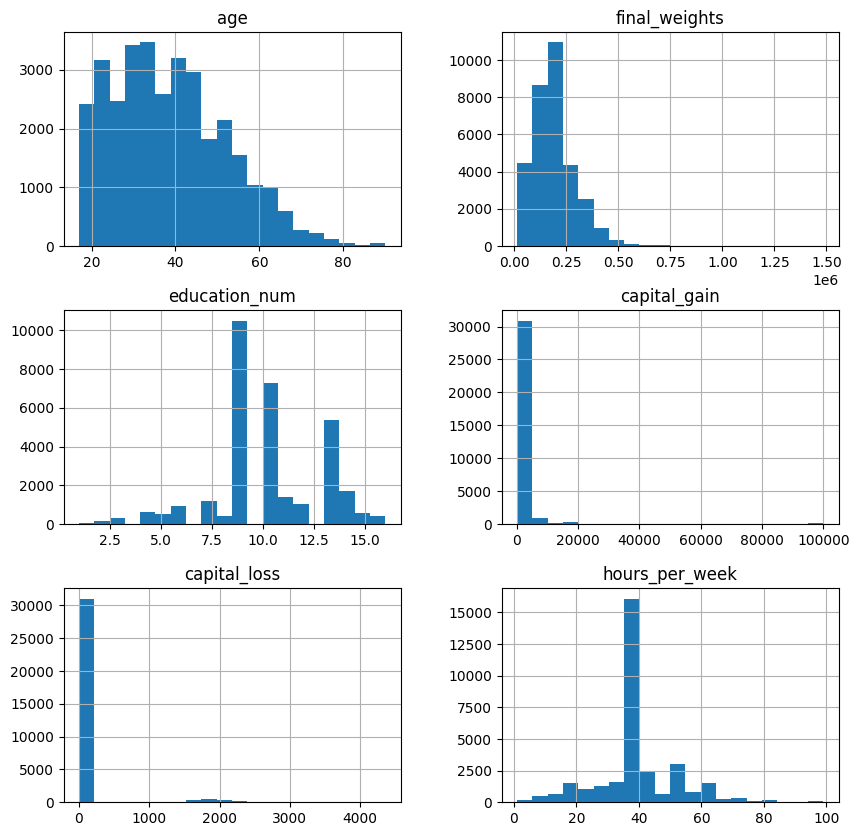

In [34]:
df.hist(bins=20,figsize=(10,10))
plt.show()

#### 1.6.1 Interpreting numerical columns distribution
I confirmed several guesses that were stated when analyzing each column statistical descriptions, such as:
- Most of the individuals have no capital losses registered (highly right-skewed). Althought, there are few people that present some capital losses around $2000
- Most of the individuals work around 40 hours per week, showing a normal like distribution, and around half of the entire sample working between 37.5 and 40 hours.
- I can see a clear right-skewed distribution in the final_weight column, meaning most of the individuals (Q2 - Q3) weigths lay between 117k - 237k individuals in representation of their "social groups". Only few individuals are weighted more heavily and asking which social groups are trying to be represented here is a must for future analysis.
- The dataset captures most of the core working-age individuals, and this makes sense if we take into account the dataset's nature.
- Final weights standard deviation is very high, showing that there is a high diversity of population representation over individuals. This also applies to the ages.


### 1.7 Categorical Variables: Quick Counts

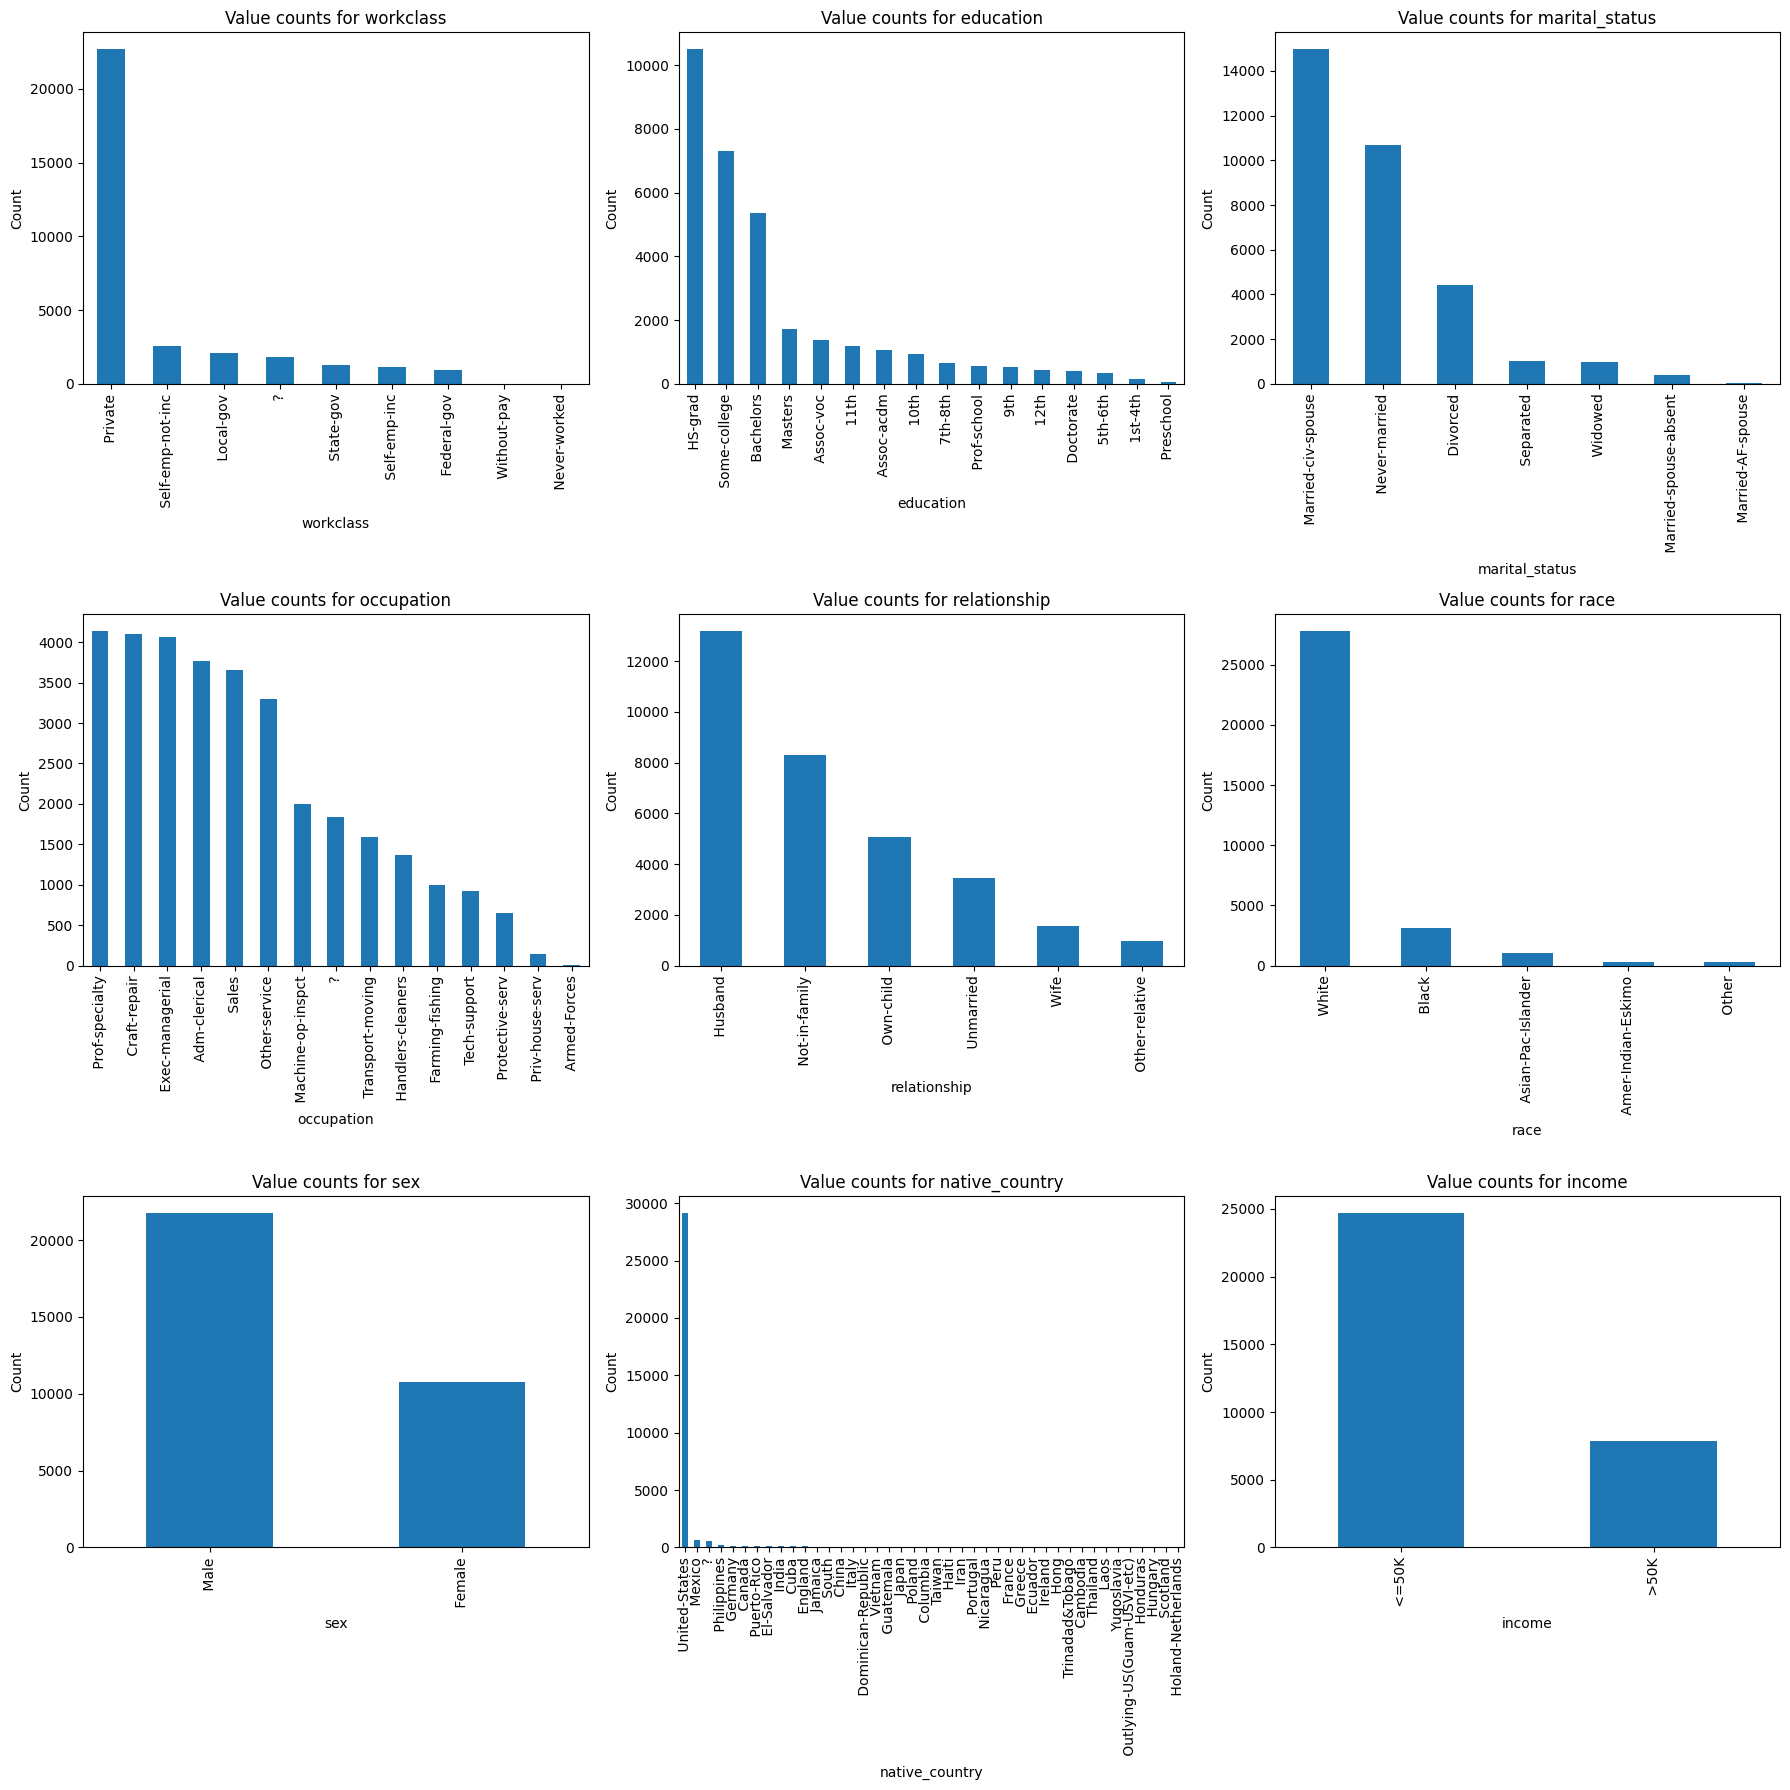

In [43]:
n = len(categorical_cols)

cols = 3
rows = int(n/cols)


fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 6*rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    df[col].value_counts().plot(kind="bar", ax=axes[i])
    axes[i].set_title(f"Value counts for {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# Hide unused subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### 1.7.1 Interpreting Categorical Columns Count Plots
- There are, indeed, several columns such as `workclass`, `occupation` and `native_country` that do have missing values, despite I checked column nullability before. Those are symbolized by a question mark.
- These missing values may affect the dataset general quality, especially for occupation related analysis since this is the column that seems to be more affected by this issue.
- Confirmed the income class imbalance when looking into the class distribution count plot.
- Potential bias in race based analysis as the dataset includes a substantial majority of "white" individuals.
- Confirmed gender imbalance.
- The `relationship` column reflects the gender imbalance discussed previously in the way most of individuals are defined to be husbands compared to wifes.
- The `marital_status` column reflects that most of individuals are either married or have never married. Special cases such as widowed or divorced.
- Type of education reflects most of the participants are either in high school, taking a bachelors degree or college. This may be related to also having young individuals as a majority.


### Notes on Dataset structure, types, and potential issues

Analyzing the `education_num` column vs `education` to understand the relationship between both columns.

Judging by the dataset previews, it seems each education type relates to a fixed number of education years. Let's confirm that:

In [10]:
df.groupby('education')['education_num'].nunique()

education
10th            1
11th            1
12th            1
1st-4th         1
5th-6th         1
7th-8th         1
9th             1
Assoc-acdm      1
Assoc-voc       1
Bachelors       1
Doctorate       1
HS-grad         1
Masters         1
Preschool       1
Prof-school     1
Some-college    1
Name: education_num, dtype: int64

In [12]:
df.groupby('education')['education_num'].max()

education
10th             6
11th             7
12th             8
1st-4th          2
5th-6th          3
7th-8th          4
9th              5
Assoc-acdm      12
Assoc-voc       11
Bachelors       13
Doctorate       16
HS-grad          9
Masters         14
Preschool        1
Prof-school     15
Some-college    10
Name: education_num, dtype: int64

**Structure and Data Types:**
- The relationship between both `education_num` and `education` columns can be explained by a dictionary. This is a good way to save storage and still represent the same data.
- Every numerical feature is an integer.

**Potential Issues:**
- As discussed previously, even thought our dataset has no null values, it may keep unexpected values. If we keep on using this dataset, making sure data is consistent is also a must.
- The `final_weight` column seems to be very interesting and useful. However it may be confusing to handle, especially when trying to develop conclusions that accurately represent the entire population.




### Early thoughts on possible analysis directions
- Possible new column definition out of `capital_gain - capital_loss` to determine heritage.
- The previous columnn definition could be compared to demographic information as well. Interesting insights could come up from this analysis.
- Using visualization tools to understand how are the occupation, number of worked hours and age coliumns related to the income.
- How is income related to: `gender`, `education`, `native_country` and more categories.
- Possible color definition using the `gender` column.
- Resarch reasons behind gender imbalance.
